# Query 4.1
Import the csv file of the stock which contained the Bollinger columns as well. Create a new column 'Call' , whose entries are - 'Buy' if the stock price is below the lower Bollinger band 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 'Short' if the stock price is above the upper Bollinger band Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each) Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#saving the bollinger band columns
tcs_dat = pd.read_csv("I:\\data\\TCS.csv")
tcs_dat['14 Day MA'] = tcs_dat['Close Price'].rolling(window=14).mean()
tcs_dat['30 Day STD'] = tcs_dat['Close Price'].rolling(window=20).std()
tcs_dat['Upper Band'] = tcs_dat['14 Day MA'] + (tcs_dat['30 Day STD'] * 2)
tcs_dat['Lower Band'] = tcs_dat['14 Day MA'] - (tcs_dat['30 Day STD'] * 2)
tcs_dat = tcs_dat.dropna()
tcs_dat['Mid Band'] = (tcs_dat['Upper Band']+tcs_dat['Lower Band'])/2
tcs_dat

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000
24,TCS,EQ,16-Jun-2017,2411.20,2414.95,2435.00,2386.50,2395.00,2399.70,2402.96,1225213,2.944142e+09,72001,709697,57.92,2527.132143,72.062858,2671.257859,2383.006427,2527.132143
25,TCS,EQ,19-Jun-2017,2399.70,2416.90,2446.35,2405.15,2432.00,2431.70,2430.50,822371,1.998776e+09,53034,493678,60.03,2518.603571,75.916937,2670.437445,2366.769698,2518.603571
26,TCS,EQ,20-Jun-2017,2431.70,2431.00,2449.00,2380.30,2443.60,2445.00,2427.14,835479,2.027828e+09,56385,443227,53.05,2511.346429,78.434866,2668.216161,2354.476696,2511.346429
27,TCS,EQ,21-Jun-2017,2445.00,2440.00,2442.15,2397.20,2406.75,2406.30,2412.24,828909,1.999530e+09,60134,488457,58.93,2500.825000,82.730029,2666.285059,2335.364941,2500.825000
28,TCS,EQ,22-Jun-2017,2406.30,2409.00,2431.00,2385.00,2391.45,2394.85,2403.02,2887941,6.939787e+09,51314,2442403,84.57,2488.678571,83.668737,2656.016045,2321.341098,2488.678571


In [10]:

def select_buy(tcs_dat):
    if tcs_dat['Close Price'] < tcs_dat['Lower Band']:
        return "Buy"
    if tcs_dat['Close Price'] > tcs_dat['Lower Band'] and tcs_dat['Close Price'] < tcs_dat['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if tcs_dat['Close Price'] > tcs_dat['Mid Band'] and tcs_dat['Close Price'] < tcs_dat['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if tcs_dat['Close Price'] > tcs_dat['Upper Band']:
        return "Short"
tcs_dat = tcs_dat.assign(Call = tcs_dat.apply(select_buy, axis=1))
tcs_dat

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,...,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714,Hold Buy/ Liquidate Short
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,...,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429,Hold Buy/ Liquidate Short
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,...,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714,Hold Buy/ Liquidate Short
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,...,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143,Hold Buy/ Liquidate Short
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,...,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000,Hold Buy/ Liquidate Short
24,TCS,EQ,16-Jun-2017,2411.20,2414.95,2435.00,2386.50,2395.00,2399.70,2402.96,...,2.944142e+09,72001,709697,57.92,2527.132143,72.062858,2671.257859,2383.006427,2527.132143,Hold Buy/ Liquidate Short
25,TCS,EQ,19-Jun-2017,2399.70,2416.90,2446.35,2405.15,2432.00,2431.70,2430.50,...,1.998776e+09,53034,493678,60.03,2518.603571,75.916937,2670.437445,2366.769698,2518.603571,Hold Buy/ Liquidate Short
26,TCS,EQ,20-Jun-2017,2431.70,2431.00,2449.00,2380.30,2443.60,2445.00,2427.14,...,2.027828e+09,56385,443227,53.05,2511.346429,78.434866,2668.216161,2354.476696,2511.346429,Hold Buy/ Liquidate Short
27,TCS,EQ,21-Jun-2017,2445.00,2440.00,2442.15,2397.20,2406.75,2406.30,2412.24,...,1.999530e+09,60134,488457,58.93,2500.825000,82.730029,2666.285059,2335.364941,2500.825000,Hold Buy/ Liquidate Short
28,TCS,EQ,22-Jun-2017,2406.30,2409.00,2431.00,2385.00,2391.45,2394.85,2403.02,...,6.939787e+09,51314,2442403,84.57,2488.678571,83.668737,2656.016045,2321.341098,2488.678571,Hold Buy/ Liquidate Short


In [14]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
train_X = tcs_dat[['Upper Band','Lower Band','Mid Band','Close Price']]
transfomed_label = le.fit_transform(tcs_dat[['Call']])

In [15]:
train_Y = transfomed_label.reshape(-1,1)

In [16]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
import pandas as pd  
import os

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9582

In [17]:
import sklearn as sk  
from sklearn import svm  
import pandas as pd  
import os

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

C:\Users\adarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machines


C:\Users\adarsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8664

In [18]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

C:\Users\adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Random Forests


0.6555

In [19]:
import sklearn as sk  
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4)

C:\Users\adarsh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Networks


0.5365

# Query 4.2¶
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier. Import the stock data file of your choice Define 4 new columns , whose values are: % change between Open and Close price for the day % change between Low and High price for the day 5 day rolling mean of the day to day % change in Close Price 5 day rolling std of the day to day % change in Close Price Create a new column 'Action' whose values are: 1 if next day's price(Close) is greater than present day's. (-1) if next day's price(Close) is less than present day's. i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ] Construct a classification model with the 4 new inputs and 'Action' as target Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [20]:
import pandas as pd
wipro_data = pd.read_csv("I:\\data\\wipro_stock_data.csv")
wipro_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.80,260.05,255.85,256.50,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.10,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.00,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.20,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.70,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46
5,WIPRO,EQ,13-Jul-2017,263.80,263.90,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85
6,WIPRO,EQ,14-Jul-2017,264.05,264.15,264.95,259.00,260.00,259.85,261.04,2454505,6.407118e+08,26482,1745504,71.11
7,WIPRO,EQ,17-Jul-2017,259.85,266.40,274.00,264.55,268.30,266.85,268.57,7769247,2.086617e+09,77803,3130717,40.30
8,WIPRO,EQ,18-Jul-2017,266.85,267.30,272.65,266.50,269.00,269.00,269.29,2753504,7.415038e+08,51369,1230138,44.68
9,WIPRO,EQ,19-Jul-2017,269.00,270.00,272.05,267.30,271.55,271.10,269.87,2973058,8.023333e+08,34946,1899172,63.88


In [21]:
wipro_data['%chg op_cl'] = ((wipro_data['Close Price'] - wipro_data ['Open Price'])/(wipro_data['Close Price']))*100
wipro_data['%chg lw_hg'] = ((wipro_data['Close Price'] - wipro_data ['High Price'])/(wipro_data['Low Price']))*100
wipro_data['%chg 5dymean'] = wipro_data['Close Price'].pct_change().dropna().rolling(5).mean()
wipro_data['%chg 5dystd'] = wipro_data['Close Price'].pct_change().dropna().rolling(5).std()
wipro_data = wipro_data.dropna()
wipro_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,WIPRO,EQ,13-Jul-2017,263.80,263.90,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85,0.056807,-0.688468,0.005029,0.021852
6,WIPRO,EQ,14-Jul-2017,264.05,264.15,264.95,259.00,260.00,259.85,261.04,2454505,6.407118e+08,26482,1745504,71.11,-1.654801,-1.969112,0.001887,0.023831
7,WIPRO,EQ,17-Jul-2017,259.85,266.40,274.00,264.55,268.30,266.85,268.57,7769247,2.086617e+09,77803,3130717,40.30,0.168634,-2.702703,-0.000913,0.018269
8,WIPRO,EQ,18-Jul-2017,266.85,267.30,272.65,266.50,269.00,269.00,269.29,2753504,7.415038e+08,51369,1230138,44.68,0.631970,-1.369606,0.004463,0.015412
9,WIPRO,EQ,19-Jul-2017,269.00,270.00,272.05,267.30,271.55,271.10,269.87,2973058,8.023333e+08,34946,1899172,63.88,0.405754,-0.355406,0.005569,0.015414
10,WIPRO,EQ,20-Jul-2017,271.10,270.75,274.25,268.25,270.00,269.15,271.06,2676624,7.255154e+08,31166,1223139,45.70,-0.594464,-1.901212,0.003941,0.016421
11,WIPRO,EQ,21-Jul-2017,269.15,283.90,290.90,280.25,285.65,286.05,286.85,16392253,4.702062e+09,128041,3914823,23.88,0.751617,-1.730598,0.019680,0.026969
12,WIPRO,EQ,24-Jul-2017,286.05,290.20,293.50,289.25,291.00,291.55,291.58,6554857,1.911257e+09,66787,2774019,42.32,0.463042,-0.674157,0.018138,0.026669
13,WIPRO,EQ,25-Jul-2017,291.55,292.85,292.95,289.00,289.55,289.55,290.01,3372477,9.780585e+08,49743,2172360,64.41,-1.139700,-1.176471,0.015154,0.028826
14,WIPRO,EQ,26-Jul-2017,289.55,290.00,291.50,287.80,289.95,289.35,289.37,2970592,8.595899e+08,36343,1960180,65.99,-0.224641,-0.747047,0.013455,0.029608


In [22]:

arr = []
val = []
for value in wipro_data['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
wipro_data['Action'] = pd.DataFrame(val)
wipro_data = wipro_data.dropna()
wipro_data

C:\Users\adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,WIPRO,EQ,13-Jul-2017,263.80,263.90,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85,0.056807,-0.688468,0.005029,0.021852,1.0
6,WIPRO,EQ,14-Jul-2017,264.05,264.15,264.95,259.00,260.00,259.85,261.04,2454505,6.407118e+08,26482,1745504,71.11,-1.654801,-1.969112,0.001887,0.023831,1.0
7,WIPRO,EQ,17-Jul-2017,259.85,266.40,274.00,264.55,268.30,266.85,268.57,7769247,2.086617e+09,77803,3130717,40.30,0.168634,-2.702703,-0.000913,0.018269,-1.0
8,WIPRO,EQ,18-Jul-2017,266.85,267.30,272.65,266.50,269.00,269.00,269.29,2753504,7.415038e+08,51369,1230138,44.68,0.631970,-1.369606,0.004463,0.015412,-1.0
9,WIPRO,EQ,19-Jul-2017,269.00,270.00,272.05,267.30,271.55,271.10,269.87,2973058,8.023333e+08,34946,1899172,63.88,0.405754,-0.355406,0.005569,0.015414,1.0
10,WIPRO,EQ,20-Jul-2017,271.10,270.75,274.25,268.25,270.00,269.15,271.06,2676624,7.255154e+08,31166,1223139,45.70,-0.594464,-1.901212,0.003941,0.016421,-1.0
11,WIPRO,EQ,21-Jul-2017,269.15,283.90,290.90,280.25,285.65,286.05,286.85,16392253,4.702062e+09,128041,3914823,23.88,0.751617,-1.730598,0.019680,0.026969,-1.0
12,WIPRO,EQ,24-Jul-2017,286.05,290.20,293.50,289.25,291.00,291.55,291.58,6554857,1.911257e+09,66787,2774019,42.32,0.463042,-0.674157,0.018138,0.026669,1.0
13,WIPRO,EQ,25-Jul-2017,291.55,292.85,292.95,289.00,289.55,289.55,290.01,3372477,9.780585e+08,49743,2172360,64.41,-1.139700,-1.176471,0.015154,0.028826,-1.0
14,WIPRO,EQ,26-Jul-2017,289.55,290.00,291.50,287.80,289.95,289.35,289.37,2970592,8.595899e+08,36343,1960180,65.99,-0.224641,-0.747047,0.013455,0.029608,-1.0


In [23]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
# le = preprocessing.LabelEncoder()
train_X = wipro_data[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = wipro_data[['Action']]
# trafomed_label = le.fit_transform(tcs_dat[['Call']])
# train_Y = transfomed_label.reshape(-1,1)

import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

C:\Users\adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forests


0.6276

C:\Users\adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


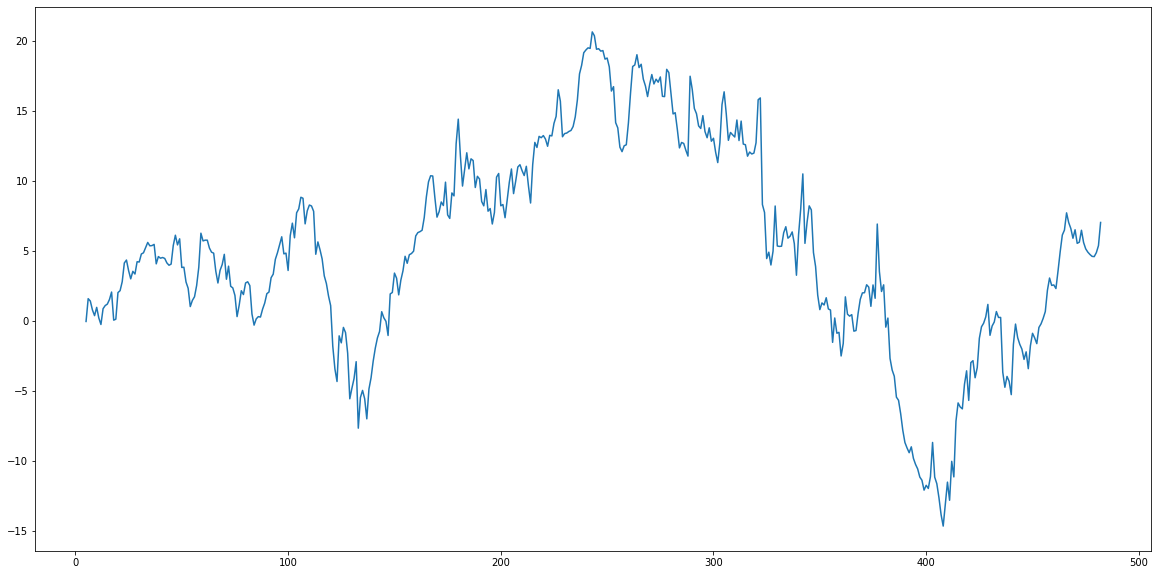

In [24]:
wipro_data['Net Cummulative Returns'] = (((wipro_data['Open Price'] - wipro_data['Close Price'])/(wipro_data['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(wipro_data['Net Cummulative Returns'])